## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
- True Positive: Null is false and we rejected the null. 
- True Negative: Null is true and we accepted the null.
- A type I error is when we reject the null hypothesis, but, in reality, the null hypothesis is true. (Rejecting null hypothisis incrorrectly)
- A type II error is when we fail to reject the null hypothesis when it is actually false. p-value > alpha. (Rejecting alternative hypothisis incorrectly)
- p-value: probability that we observed this result due to chance. if it's less than our alpha, we reject the null hypothesis...there IS a difference, or a relationship. p-value < alpha.


### Has the network latency gone up since we switched internet service providers?


##### 
$H_{0}$ - Is the network latency the same or less since we switched internet service providers? 

$H_{a}$ - Is the network latency higher since we switched internet service providers? 

- True Positive: The latency is higher
- True Negative: The latency is lower
- Type I error: p-value > alpha. This would lead us to NOT reject the null hypothisis and believe that network latency was the same or less when in reality it was higher. 
- Type II error: p-value < alpha. This would lead us to believe that the null hypothisis was true when in reality network latency was the same or less. 

### Is the website redesign any good?


##### 
$H_{0}$ - Has the new website maintained or decreased click through rate? 

$H_{a}$ - Has the new website increased clickthrough rate? 

- True Positive: Null is false and we rejected the null. So, in this case clickthrough rate has increased since implimenting the new site.
- True Negative: Null is true and we accepted the null. Clickthrough rate has stayed the same or decreased. 
- Type I error: Rejected the null hypothesis, but, in reality, the null hypothesis is true. So, we think that the new website has increased clickthrough but it actually has not. 
- Type II error: Fail to reject the null hypothesis when it is actually false. So, we think that the new website has maintained or decreased clickthrough.

### Is our television ad driving more sales?

#### 
$H_{0}$ - Have our sales remained the same or decreased since running our ad?

$H_{a}$ - Have our sales increased since running our ad?

- True Positive: Null is false and we rejected the null. So, in this case the ad caused sales to increase.
- True Negative: Null is true and we accepted the null. Sales remained the same or decreased dispite the ad.  
- Type I error: Rejected the null hypothesis, but, in reality, the null hypothesis is true. So, we think that the ad has increased sales.
- Type II error: Fail to reject the null hypothesis when it is actually false. So, we think that the ad has not increased sales. 

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [59]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Ho: Average time it takes to sell homes office one = Average time it takes to sell homes office two


#### Ha: Average time it takes to sell homes office one != Average time it takes to sell homes office two

In [23]:
n1 = office1_sample = 40
n2 = office2_sample = 50

mu1 = office1_avg_days = 90
mu2 = office2_avg_days = 100

s1 = office1_stdv = 15
s2 = office2_stdv = 20

alpha = 0.05

degf = office1_sample + office2_sample - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (mu1 - mu2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [30]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

In [28]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)
t,p

(-2.6252287036468456, 0.01020985244923939)

##### We can reject the null hypothesis 

### Load the mpg dataset and use it to answer the following questions:



In [40]:
from pydataset import data
mpg = data('mpg')
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


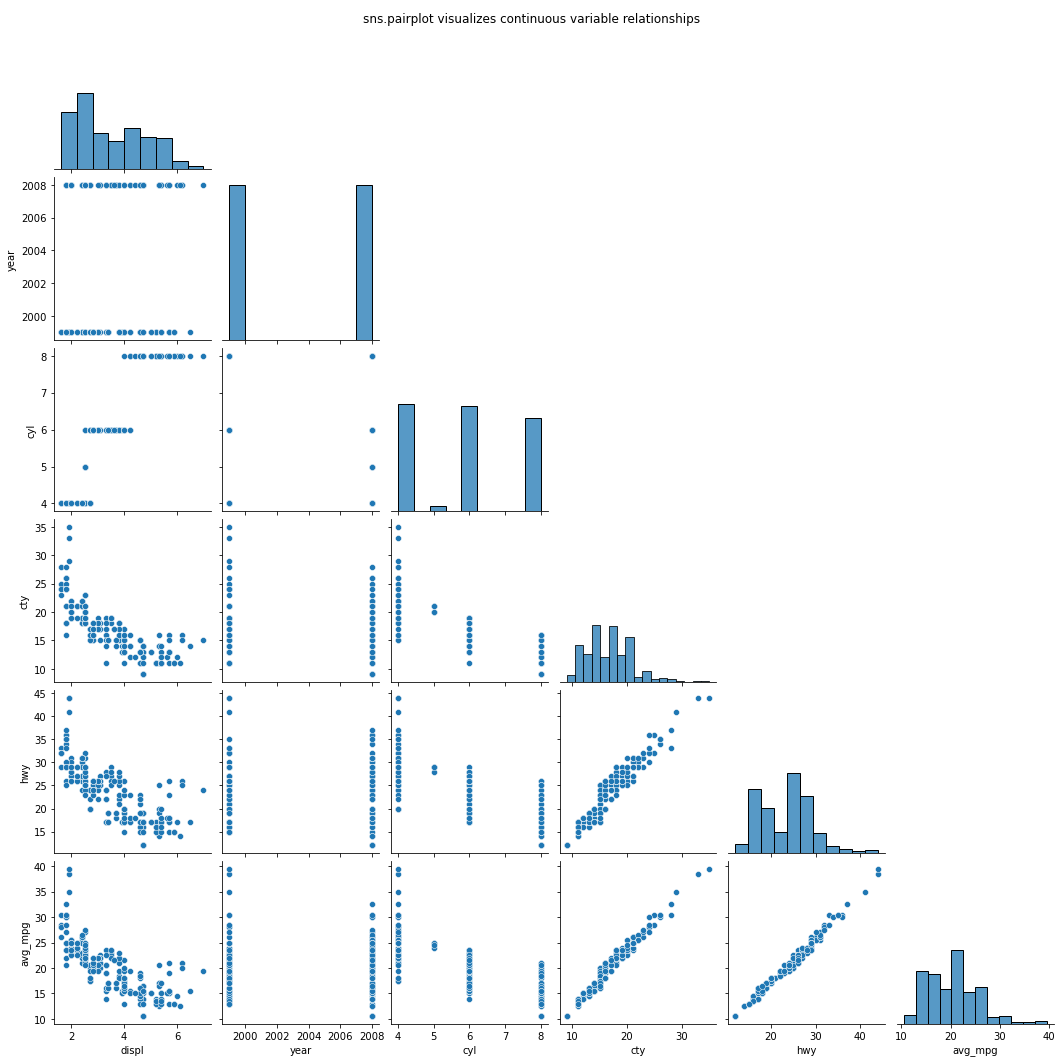

In [120]:
sns.pairplot(mpg, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [121]:
mpg.corr()

,displ,year,cyl,cty,hwy,avg_mpg
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020,-0.788059
year,0.147843,1.000000,0.122245,-0.037232,0.002158,-0.014416
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912,-0.788691
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916,0.984902
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000,0.992316
avg_mpg,-0.788059,-0.014416,-0.788691,0.984902,0.992316,1.000000


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Ho: Fuel efficiency in 1999 = Fuel efficiency in 2008
- Ha: Fuel efficiency in 1999 != Fuel efficiency in 2008


In [57]:
year_diff_df = mpg[(mpg.year==1999) | (mpg.year==2008)]

year_diff_df["avg_mpg"] = year_diff_df[["cty", "hwy"]].mean(axis=1)

year_diff_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


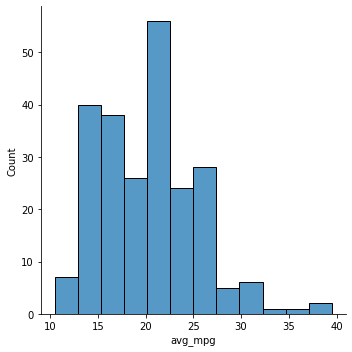

In [87]:
sns.displot(year_diff_df.avg_mpg)

# a = year_diff_df[year_diff_df.year == 1999].avg_mpg
# b = year_diff_df[year_diff_df.year == 2008].avg_mpg
# sns.displot([a, b], color=['blue','green'], alpha=0.5)

plt.show()

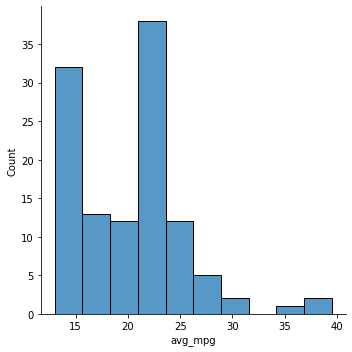

In [113]:
# 1999 cars average mpg
sns.displot(year_diff_df[year_diff_df.year == 1999].avg_mpg)
plt.show()

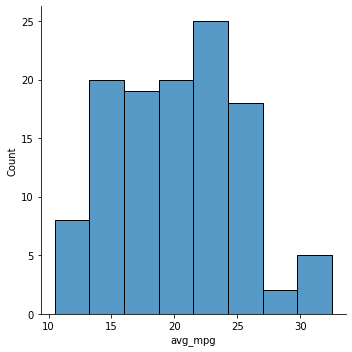

In [114]:
# 2008 cars average mpg
sns.displot(year_diff_df[year_diff_df.year == 2008].avg_mpg)
plt.show()

In [73]:
yr99 = year_diff_df[year_diff_df.year == 1999].avg_mpg.mean()
yr08 = year_diff_df[year_diff_df.year == 2008].avg_mpg.mean()
yr99, yr08

(20.22222222222222, 20.076923076923077)

In [88]:
#yr99 = year_diff_df.avg_mpg.where(year_diff_df.year == 1999)
#yr08 = year_diff_df.avg_mpg.where(year_diff_df.year == 2008)

yr99 = year_diff_df[year_diff_df.year == 1999].avg_mpg
yr08 = year_diff_df[year_diff_df.year == 2008].avg_mpg

t, p = stats.ttest_ind(yr99, yr08)
t, p

(0.21960177245940962, 0.8263744040323578)

##### p>0.05, Therefore, there is not a significant difference in fuel efficiency between 1999 and 2008 cars

### Are compact cars more fuel-efficient than the average car?
- Ho: Compact car efficiency <= average car
- Ha: Compact car efficiency > average car

In [93]:
# Change 'class' column name
mpg = mpg.rename(columns={'class': 'typ'})

In [94]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,typ
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [99]:
mpg.typ[mpg.typ == "compact"].count()
mpg.typ.count()

234

In [100]:
# Add average mgp column
mpg["avg_mpg"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,typ,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


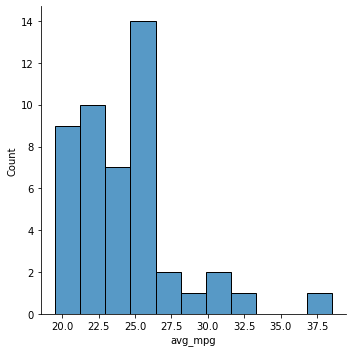

In [116]:
# compact car's average mpg
sns.displot(mpg[mpg.typ == "compact"].avg_mpg)
plt.show()

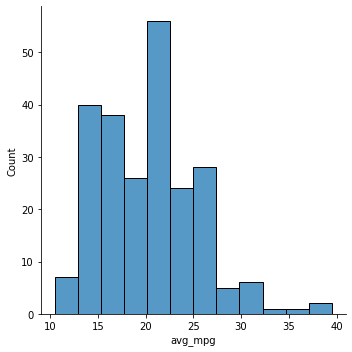

In [117]:
# All car's average mpg
sns.displot(mpg.avg_mpg)
plt.show()

In [105]:
compact_mpg = mpg[mpg.typ == "compact"].avg_mpg

t, p = stats.ttest_1samp(compact_mpg, mpg.avg_mpg.mean())
t, p

(7.896888573132535, 4.1985637943171336e-10)

##### p<0.05 Therefore, we reject the null hypothesis, and can say that compact cars on average are more efficient than the whole

### Do manual cars get better gas mileage than automatic cars?
- Ho: Manual car gas milage <= automatic car
- Ha: Manual car gas milage > automatic car

In [111]:
#Variables to hold the separate 'auto' and 'manual' series average mpg
manual_mpg = mpg[mpg.trans.str.contains("manual")].avg_mpg
automatic_mpg = mpg[mpg.trans.str.contains("auto")].avg_mpg


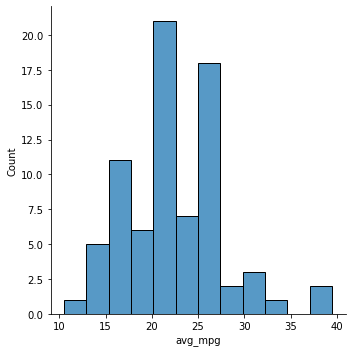

In [118]:
# compact car's average mpg
sns.displot(mpg[mpg.trans.str.contains("manual")].avg_mpg)
plt.show()

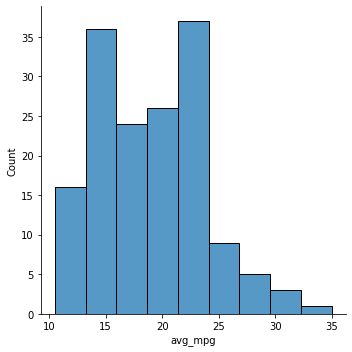

In [119]:
# compact car's average mpg
sns.displot(mpg[mpg.trans.str.contains("auto")].avg_mpg)
plt.show()

In [112]:
t, p = stats.ttest_ind(manual_mpg, automatic_mpg)
t, p

(4.593437735750014, 7.154374401145683e-06)

##### p<0.05 Therefore, we reject the null hypothesis, and can say that manual car mpg on average is greater than auto transmission mpg

## Use the telco_churn data. 
* **This Data is only the Month-to-Month Customers**


In [130]:
# Import telco data
telco_df = pd.read_csv('telco.csv')

# Remove unecessary columns
telco_df = telco_df.drop(columns=['Unnamed: 26', 'Unnamed: 27'])
telco_df

,customer_id,gender,is_female,is_senior_citizen,partner,dependents,partner_dependents,has_phone,phone_service,phone_service_type,...,contract_type.1,payment_type,monthly_charges,Avg_monthly_charge,total_charges,Tenure_Mo,Tenure_Days,start_date,churn,has_churned
0,0023-HGHWL,Male,False,1.0,No,No,0.0,False,0.0,No Phone Service,...,Month-to-Month,Electronic check,25.10,25.1,25.10,1.0,30.0,20210710.0,Yes,True
1,0032-PGELS,Female,True,0.0,Yes,Yes,3.0,False,0.0,No Phone Service,...,Month-to-Month,Bank transfer (automatic),30.50,30.5,30.50,1.0,30.0,20210710.0,Yes,True
2,0107-WESLM,Male,False,0.0,No,No,0.0,True,1.0,One Line,...,Month-to-Month,Electronic check,19.85,19.9,19.85,1.0,30.0,20210710.0,Yes,True
3,0107-YHINA,Male,False,0.0,No,Yes,2.0,True,2.0,Two or More Lines,...,Month-to-Month,Electronic check,99.75,99.8,99.75,1.0,30.0,20210710.0,Yes,True
4,0137-OCGAB,Female,True,0.0,No,No,0.0,True,2.0,Two or More Lines,...,Month-to-Month,Mailed check,80.20,80.2,80.20,1.0,30.0,20210710.0,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Removing empty rows
telco_df = telco_df.dropna(subset=['customer_id'])
telco_df

,customer_id,gender,is_female,is_senior_citizen,partner,dependents,partner_dependents,has_phone,phone_service,phone_service_type,...,contract_type.1,payment_type,monthly_charges,Avg_monthly_charge,total_charges,Tenure_Mo,Tenure_Days,start_date,churn,has_churned
0,0023-HGHWL,Male,False,1.0,No,No,0.0,False,0.0,No Phone Service,...,Month-to-Month,Electronic check,25.10,25.1,25.10,1.0,30.0,20210710.0,Yes,True
1,0032-PGELS,Female,True,0.0,Yes,Yes,3.0,False,0.0,No Phone Service,...,Month-to-Month,Bank transfer (automatic),30.50,30.5,30.50,1.0,30.0,20210710.0,Yes,True
2,0107-WESLM,Male,False,0.0,No,No,0.0,True,1.0,One Line,...,Month-to-Month,Electronic check,19.85,19.9,19.85,1.0,30.0,20210710.0,Yes,True
3,0107-YHINA,Male,False,0.0,No,Yes,2.0,True,2.0,Two or More Lines,...,Month-to-Month,Electronic check,99.75,99.8,99.75,1.0,30.0,20210710.0,Yes,True
4,0137-OCGAB,Female,True,0.0,No,No,0.0,True,2.0,Two or More Lines,...,Month-to-Month,Mailed check,80.20,80.2,80.20,1.0,30.0,20210710.0,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,9350-VLHMB,Male,False,0.0,Yes,Yes,3.0,True,2.0,Two or More Lines,...,Month-to-Month,Bank transfer (automatic),89.55,89.8,6373.10,71.0,2165.0,20150906.0,No,False
3871,9481-IEBZY,Male,False,1.0,Yes,No,1.0,True,2.0,Two or More Lines,...,Month-to-Month,Credit card (automatic),112.90,113.5,8061.50,71.0,2172.0,20150830.0,No,False
3872,2615-YVMYX,Male,False,1.0,Yes,No,1.0,True,2.0,Two or More Lines,...,Month-to-Month,Electronic check,107.50,107.1,7713.55,72.0,2183.0,20150819.0,No,False
3873,3144-KMTWZ,Male,False,0.0,Yes,No,1.0,True,2.0,Two or More Lines,...,Month-to-Month,Bank transfer (automatic),93.25,92.6,6669.45,72.0,2175.0,20150826.0,No,False


### Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

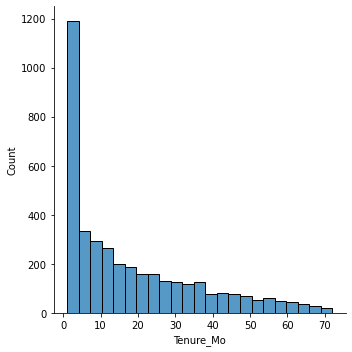

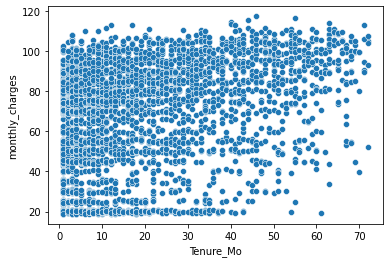

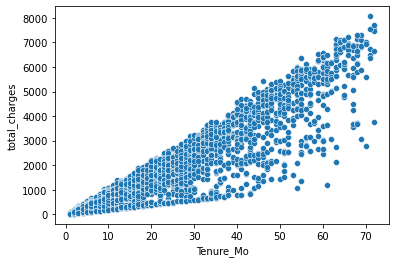

In [156]:
#sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

sns.displot(data=telco_df, x="Tenure_Mo")
plt.show()

sns.scatterplot(data=telco_df, x="Tenure_Mo", y="monthly_charges")
plt.show()

sns.scatterplot(data=telco_df, x="Tenure_Mo", y="total_charges")
plt.show()

In [157]:
# Correlation between tenure and monthly charges: Alpha = 0.05
x = telco_df.Tenure_Mo
y = telco_df.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.3619103992573717, 3.0236712950461978e-120)

In [158]:
# Correlation between tenure and total charges:
x = telco_df.Tenure_Mo
y = telco_df.total_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.9300961479567654, 0.0)

### What happens if you control for phone and internet service?

In [160]:
telco_df.head()

,customer_id,gender,is_female,is_senior_citizen,partner,dependents,partner_dependents,has_phone,phone_service,phone_service_type,...,contract_type.1,payment_type,monthly_charges,Avg_monthly_charge,total_charges,Tenure_Mo,Tenure_Days,start_date,churn,has_churned
0,0023-HGHWL,Male,False,1.0,No,No,0.0,False,0.0,No Phone Service,...,Month-to-Month,Electronic check,25.10,25.1,25.10,1.0,30.0,20210710.0,Yes,True
1,0032-PGELS,Female,True,0.0,Yes,Yes,3.0,False,0.0,No Phone Service,...,Month-to-Month,Bank transfer (automatic),30.50,30.5,30.50,1.0,30.0,20210710.0,Yes,True
2,0107-WESLM,Male,False,0.0,No,No,0.0,True,1.0,One Line,...,Month-to-Month,Electronic check,19.85,19.9,19.85,1.0,30.0,20210710.0,Yes,True
3,0107-YHINA,Male,False,0.0,No,Yes,2.0,True,2.0,Two or More Lines,...,Month-to-Month,Electronic check,99.75,99.8,99.75,1.0,30.0,20210710.0,Yes,True
4,0137-OCGAB,Female,True,0.0,No,No,0.0,True,2.0,Two or More Lines,...,Month-to-Month,Mailed check,80.20,80.2,80.20,1.0,30.0,20210710.0,Yes,True


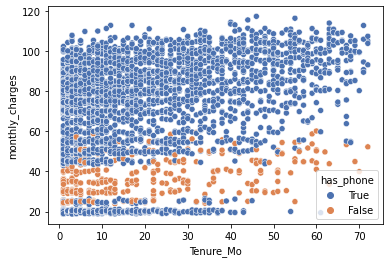

In [181]:
# Monthly Charges vs Tenure with Phone service
sns.scatterplot(data=telco_df, x="Tenure_Mo", y="monthly_charges", 
                hue="has_phone", palette="deep", hue_order=[True, False])
plt.show()

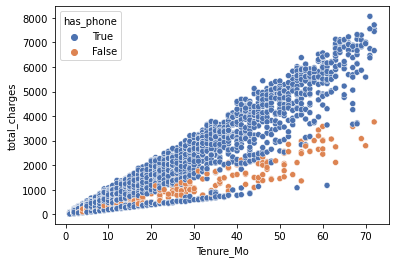

In [176]:
# Total Charges vs Tenure without Phone service
sns.scatterplot(data=telco_df, x="Tenure_Mo", y="total_charges", 
                hue="has_phone", palette="deep", hue_order=[True, False])
plt.show()

##### Customers with a phone:

In [178]:
#Telco m2m customers with a phone
telco_with_phone = telco_df[telco_df.has_phone==True]

In [182]:
# Correlation between tenure and 'monthly' charges of m2m customers with Phone Service:
x = telco_with_phone.Tenure_Mo
y = telco_with_phone.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.3999856619308716, 1.3806013161771184e-134)

In [177]:
# Correlation between tenure and 'total' charges of m2m customers with Phone Service:
x = telco_with_phone.Tenure_Mo
y = telco_with_phone.total_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.950881155276855, 0.0)

##### Customers without a phone:

In [179]:
#Telco m2m customers without a phone
telco_without_phone = telco_df[telco_df.has_phone==False]

In [183]:
# Correlation between tenure and total charges of m2m customers without Phone Service:
x = telco_without_phone.Tenure_Mo
y = telco_without_phone.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.4252541383225352, 6.0440505276432026e-18)

In [180]:
# Correlation between tenure and total charges of m2m customers without Phone Service:
x = telco_without_phone.Tenure_Mo
y = telco_without_phone.total_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.9610623871699814, 5.3373283853353286e-211)

#### Customers with Internet

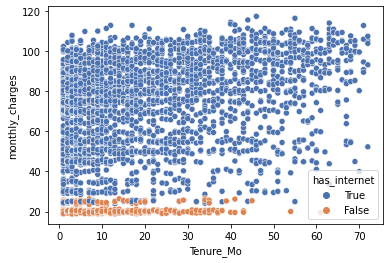

In [187]:
# Monthly Charges vs Tenure with Internet service
sns.scatterplot(data=telco_df, x="Tenure_Mo", y="monthly_charges", 
                hue="has_internet", palette="deep", hue_order=[True, False])
plt.show()

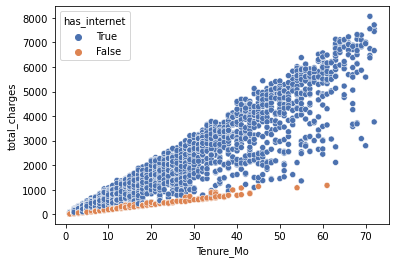

In [188]:
# Total Charges vs Tenure with Internet service
sns.scatterplot(data=telco_df, x="Tenure_Mo", y="total_charges", 
                hue="has_internet", palette="deep", hue_order=[True, False])
plt.show()

In [184]:
#Telco m2m customers with internet
telco_with_internet = telco_df[telco_df.has_internet==True]

In [185]:
# Correlation between tenure and total charges of m2m customers with Internet Service:
x = telco_with_internet.Tenure_Mo
y = telco_with_internet.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.32208712859664834, 9.572492993484979e-82)

In [186]:
# Correlation between tenure and total charges of m2m customers with Internet Service:
x = telco_with_internet.Tenure_Mo
y = telco_with_internet.total_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.9431741379366279, 0.0)

#### Customers without Internet

In [189]:
#Telco m2m customers without internet
telco_without_internet = telco_df[telco_df.has_internet==False]

In [190]:
# Correlation between tenure and total charges of m2m customers without Internet Service:
x = telco_without_internet.Tenure_Mo
y = telco_without_internet.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.17882664415264674, 3.83860945829964e-05)

In [191]:
# Correlation between tenure and total charges of m2m customers without Internet Service:
x = telco_without_internet.Tenure_Mo
y = telco_without_internet.total_charges

corr, p = stats.pearsonr(x, y)
corr, p
#Yes, there is a correlation

(0.9909747070731743, 0.0)

## Use the employees database.


In [ ]:
from env import hostname, username, password

url = f'mysql+pymysql://{username}:{password}@{hostname}/employees'

### Is there a relationship between how long an employee has been with the company and their salary?


In [ ]:
employees_df = pd.read_sql('SELECT datediff(curdate(), hire_date) AS days_with_company, salary FROM employees JOIN salaries USING(emp_no) WHERE to_date > curdate();', url)
employees_df.head()

In [ ]:
sns.scatterplot(data=employees_df, x="days_with_company", y="salary", palette="deep")
plt.show()

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


## Use the sleepstudy data. 

### Is there a relationship between days and reaction time?